## **Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

## **Load and Display Data**

In [2]:
# Load the dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Display the first few rows of the dataset
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


## **Prepare the Data**

In [3]:
# Split the data into features and target
X = data.drop('Crop', axis=1)
y = data['Crop']

In [4]:
# Convert the target variable 'Crop' to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Apply Regression Models**

In [5]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

Linear Regression MSE: 31.474262588659084


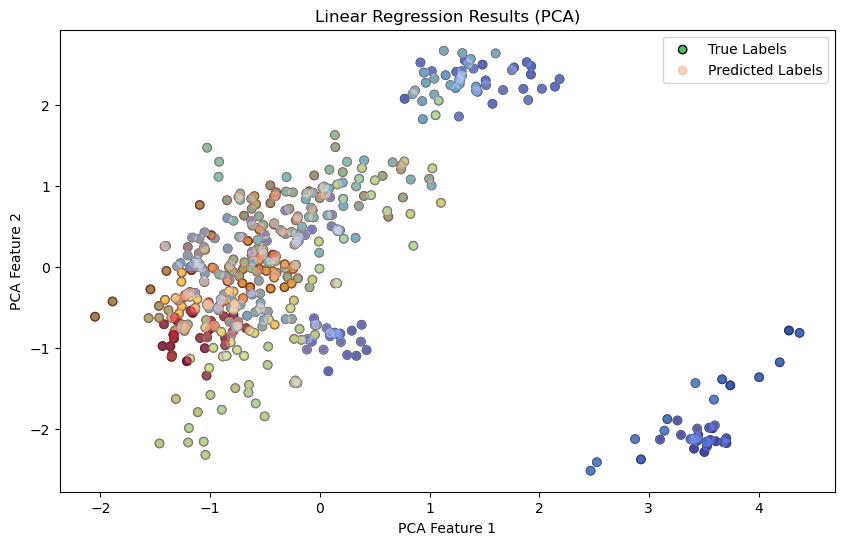

In [6]:
# Visualize Linear Regression results (using PCA to reduce dimensions for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis', label='True Labels', marker='o', edgecolor='k')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_lr, cmap='coolwarm', alpha=0.5, label='Predicted Labels')
plt.title('Linear Regression Results (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

Logistic Regression Accuracy: 0.9636363636363636


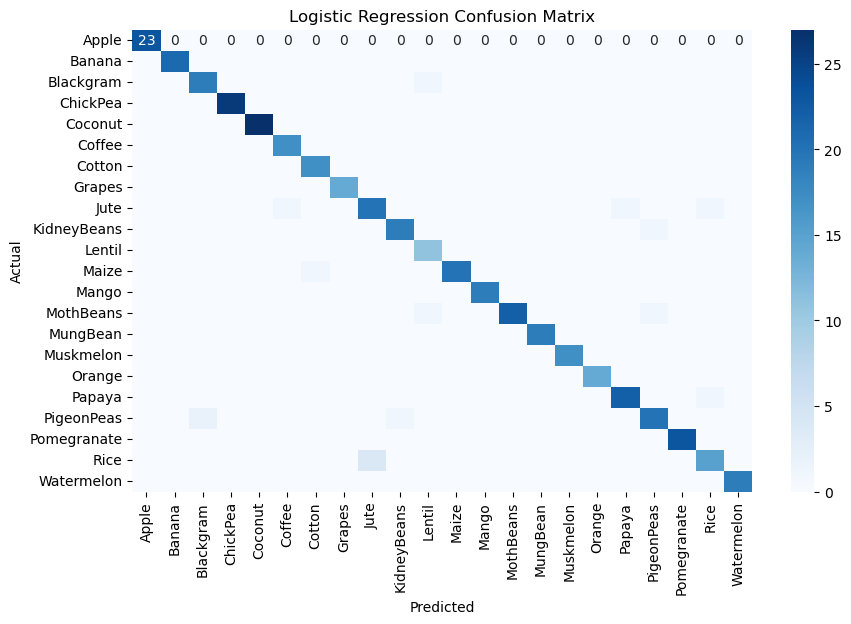

In [8]:
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

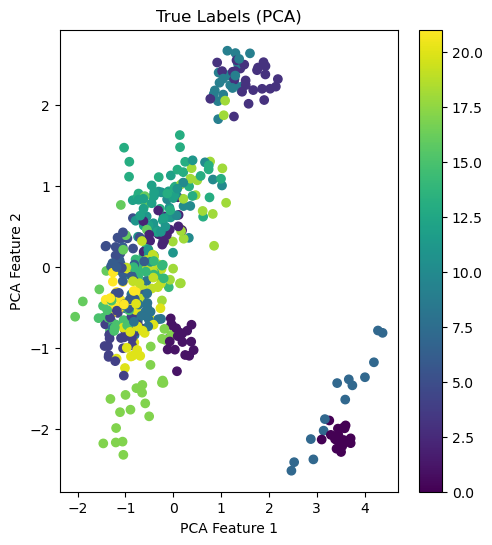

In [9]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis', label='True Labels')
plt.title('True Labels (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()

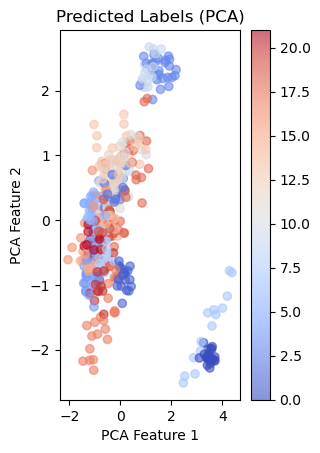

In [10]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_log_reg, cmap='coolwarm', label='Predicted Labels', alpha=0.6)
plt.title('Predicted Labels (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()